In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from stellarutil.simulation import Simulation
import numpy as np, matplotlib.pyplot as plt

# Step 1: Get the halo at index 0
m10v_r30 = Simulation(simulation_name='m10v_res030md')
m10v_r250 = Simulation(simulation_name='m10v_res250md')

def graph(x,y, title):
    # Calculate the line of best fit (regression line)
    slope, intercept = np.polyfit(x, y, 1)
    line_of_best_fit = slope * x + intercept
    # Create the scatter plot
    plt.scatter(x, y, label='Data Points')
    # Plot the line of best fit
    plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')
    # Get the max and min value
    minVal = min(min(x), min(y))
    maxVal = max(max(x), max(y))
    # Plot y=x line
    plt.plot([minVal, maxVal], [minVal, maxVal], color='green', label='y = x')
    # Set x and y limits to be normalized
    plt.xlim(minVal, maxVal)
    plt.ylim(minVal, maxVal)
    # Add labels and legend
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()
    # Show the plot
    plt.show()


../data/m10v_res030md/snapshot_600.z0.000.AHF_halos

# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10v_res030md/output/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 293563336 particles
    dark2     (id = 2): 9654601 particles
    gas       (id = 0): 293538508 particles
    star      (id = 4): 19944 particles
    blackhole (id = 5): 0 particles


# in utilities.simulation.Snapshot():
* reading:  data/m10v_res030md/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000




# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10v_res030md/output/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 293563336 particles
    dark2     (id = 2): 9654601 particles
    gas       (id = 0): 293538508 particles
    star      (id = 4): 19944 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']
  star properties: ['form.scalefactor', 'id', 'id.child', 'id.generation', 'mass', 'massfraction', 'position', 'velocity']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5
    snapshot_600.4.hdf5
    snapshot_600.5.hdf5
    snapshot_600.6.hdf5
    snapshot_600.7.hdf5
    snapshot_600.8.hdf5
    snapshot_600.9.hdf5
    snapshot_600.10.hdf5
    snapshot_600.11.hdf5
    snapshot_600.12.hdf5
    snapshot_600.13.hdf5
    snapshot_600.14.hdf5
    snapshot_600.15.hdf5

! cannot find MUSIC config file:  data/m10v_r

# Predicted z, vx, vy of star in a halo centered at 100% for m10v res 30

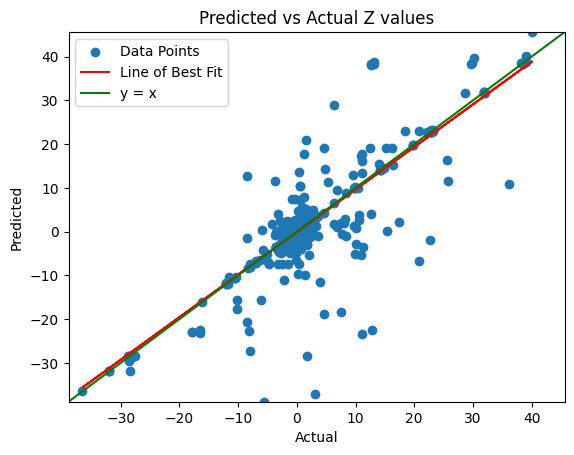

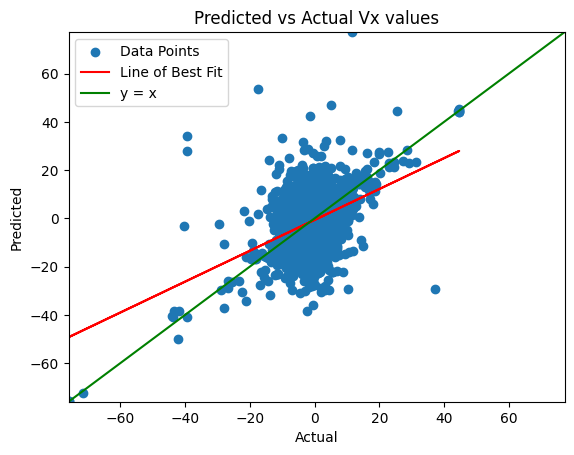

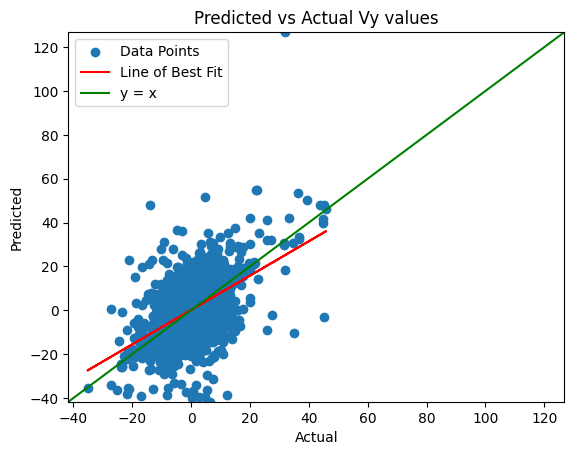

In [25]:
halo = m10v_r30.get_halo()

# Step 2: Prepare the data for training
X = []
y = []
for star in halo.stars:
    X.append([star.x, star.y, star.vz, star.a, star.get_2DR()])
    y.append([star.z, star.vx, star.vy])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
# Step 5: Predict on the test data
y_pred = knn_regressor.predict(X_test)
y_test = np.array(y_test) # Convert y_test to a NumPy array for multi-dimensional indexing

# Step 6 - Graph
graph(y_pred[:,0], y_test[:,0], "Predicted vs Actual Z values")
graph(y_pred[:,1], y_test[:,1], "Predicted vs Actual Vx values")
graph(y_pred[:,2], y_test[:,2], "Predicted vs Actual Vy values")


# Predicted z and vz of star in a halo centered at 100% for m10v res 30

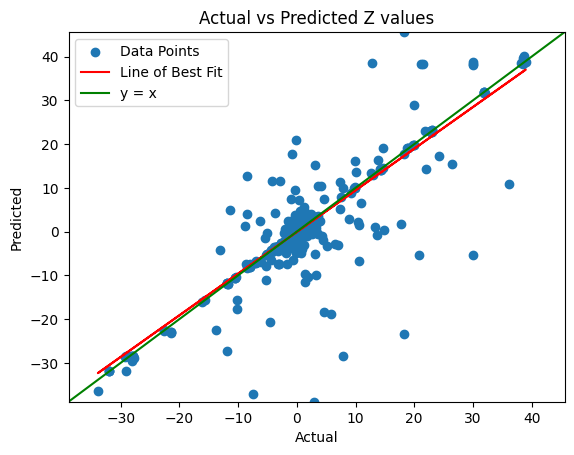

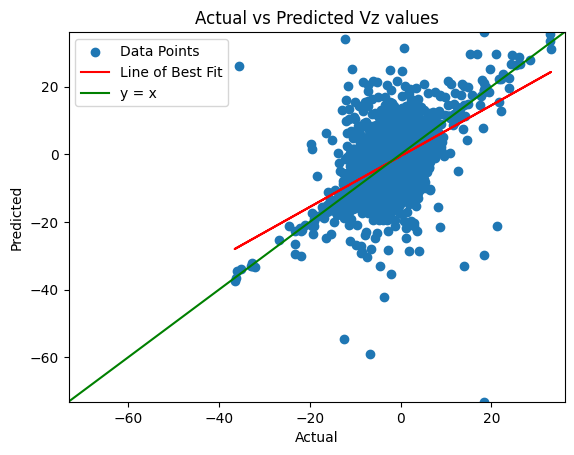

In [22]:
halo = m10v_r30.get_halo()

# Step 2: Prepare the data for training
X = []
y = []
for star in halo.stars:
    X.append([star.x, star.y, star.vx, star.vy, star.a, star.get_2DR()])
    y.append([star.z, star.vz])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
# Step 5: Predict on the test data
y_pred = knn_regressor.predict(X_test)
y_test = np.array(y_test) # Convert y_test to a NumPy array for multi-dimensional indexing

# Step 6 - Graph
graph(y_pred[:,0], y_test[:,0], "Predicted vs Actual Z values")
graph(y_pred[:,1], y_test[:,1], "Predicted vs Actual Vz values")


# Predicted z, vx, vy of star in a halo centered at 100% for m10v res 250

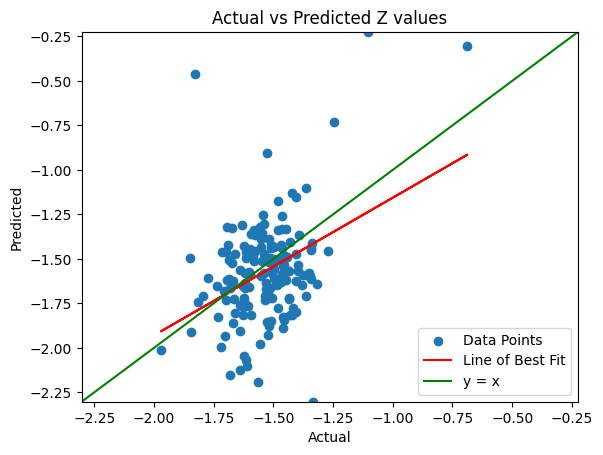

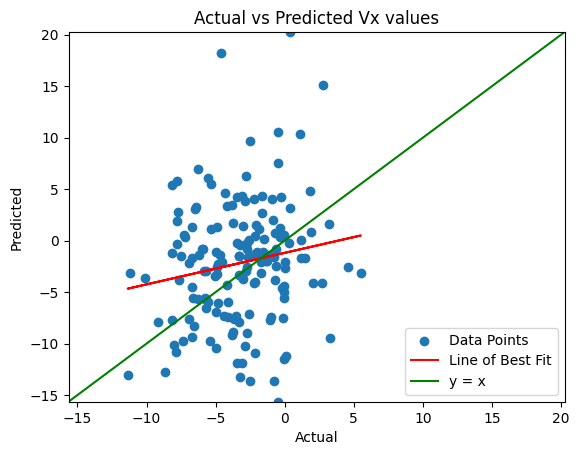

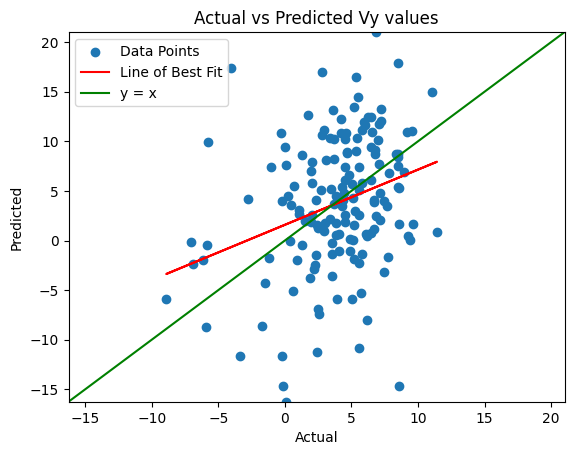

In [23]:
halo = m10v_r250.get_halo()

# Step 2: Prepare the data for training
X = []
y = []
for star in halo.stars:
    X.append([star.x, star.y, star.vz, star.a, star.get_2DR()])
    y.append([star.z, star.vx, star.vy])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
# Step 5: Predict on the test data
y_pred = knn_regressor.predict(X_test)
y_test = np.array(y_test) # Convert y_test to a NumPy array for multi-dimensional indexing

# Step 6 - Graph
graph(y_pred[:,0], y_test[:,0], "Predicted vs Actual Z values")
graph(y_pred[:,1], y_test[:,1], "Predicted vs Actual Vx values")
graph(y_pred[:,2], y_test[:,2], "Predicted vs Actual Vy values")


# Predicted z and vz of star in a halo centered at 100% for m10v res 250

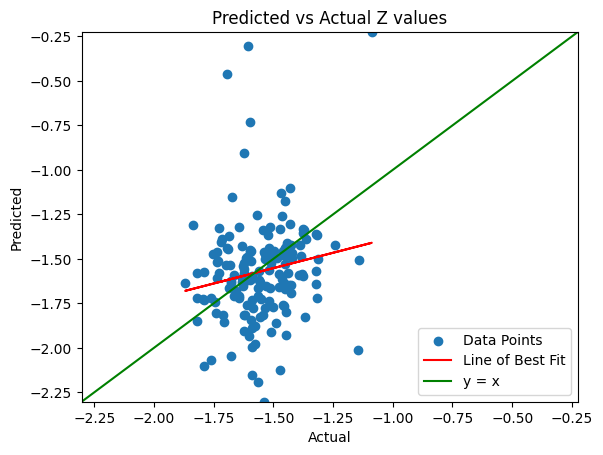

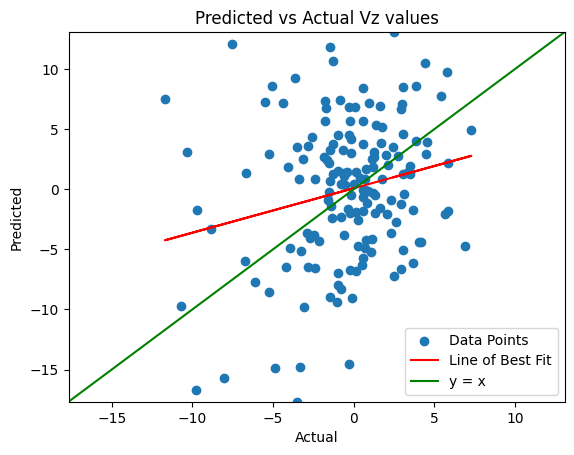

In [28]:
halo = m10v_r250.get_halo()

# Step 2: Prepare the data for training
X = []
y = []
for star in halo.stars:
    X.append([star.x, star.y, star.vx, star.vy, star.a, star.get_2DR()])
    y.append([star.z, star.vz])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
# Step 5: Predict on the test data
y_pred = knn_regressor.predict(X_test)
y_test = np.array(y_test) # Convert y_test to a NumPy array for multi-dimensional indexing

# Step 6 - Graph
graph(y_pred[:,0], y_test[:,0], "Predicted vs Actual Z values")
graph(y_pred[:,1], y_test[:,1], "Predicted vs Actual Vz values")
